# I] Import and options


In [1]:
import pandas, numpy, seaborn
# import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [3]:
experimentN = 'exp1'

In [4]:
%%time
path = input_file_directory + "mefs/mefs_seahorse_data/ecar/experiment_1/ecar_1expNorm.csv"
ecar_expNorm = pandas.read_csv(path, sep = ";")
ecar_expNorm = ecar_expNorm.rename(columns = {'Unnamed: 0':'Time'})
ecar_expNorm = ecar_expNorm.apply(lambda x: x.str.replace(',','.'))
ecar_expNorm = ecar_expNorm.astype(float)
print(ecar_expNorm.shape)
ecar_expNorm.head(2)

(15, 61)
Wall time: 30.9 ms


,Time,B02,C02,D02,E02,F02,G02,B03,C03,D03,...,D10,E10,F10,G10,B11,C11,D11,E11,F11,G11
0,1.31,2.14,2.35,2.41,3.15,2.96,3.46,1.92,2.78,2.64,...,4.25,3.74,3.63,3.38,2.00,1.39,2.10,2.23,2.40,3.52
1,7.76,2.05,2.09,2.35,3.05,2.94,3.43,1.81,2.98,2.52,...,3.40,3.53,3.54,3.72,2.03,1.45,1.64,1.69,1.97,3.00


In [5]:
#define the wells for each condition
normal = ['B02','C02','D02','E02','F02','G02']
ev_nodox = ['B03','C03','D03','E03','F03','G03']
ev = ['B04','C04','D04','E04','F04','G04']
wt1 = ['B05','C05','D05','E05','F05','G05']
wt2 = ['B06','C06','D06','E06','F06','G06']

normal_baf = ['B07','C07','D07','E07','F07','G07']
ev_nodox_baf = ['B08','C08','D08','E08','F08','G08']
ev_baf = ['B09','C09','D09','E09','F09','G09']
wt1_baf = ['B10','C10','D10','E10','F10','G10']
wt2_baf = ['B11','C11','D11','E11','F11','G11']

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


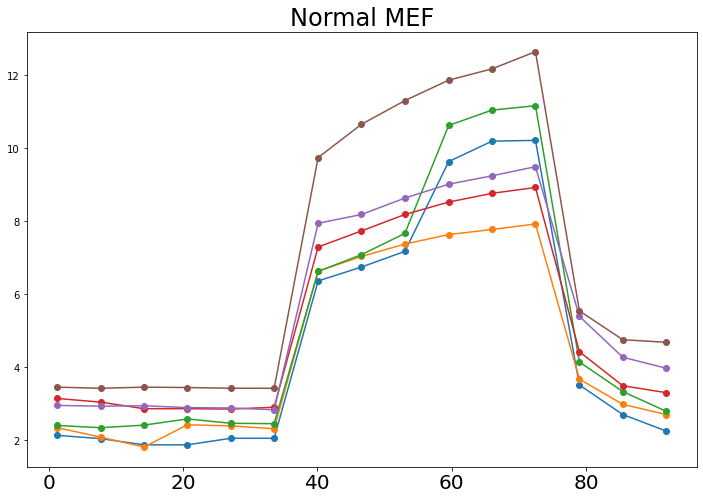

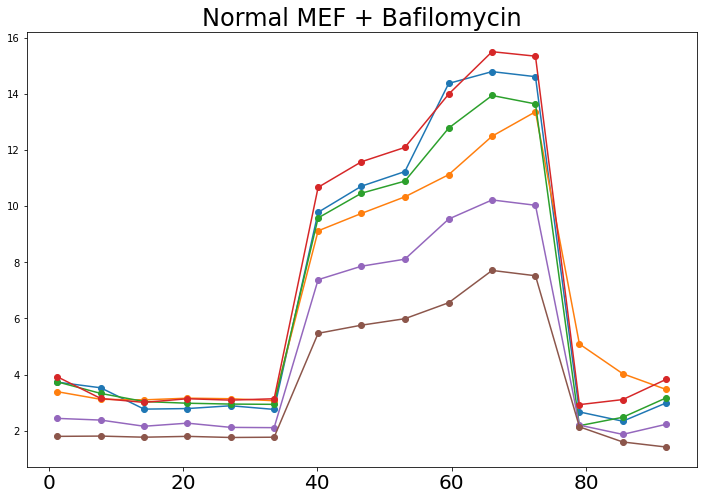

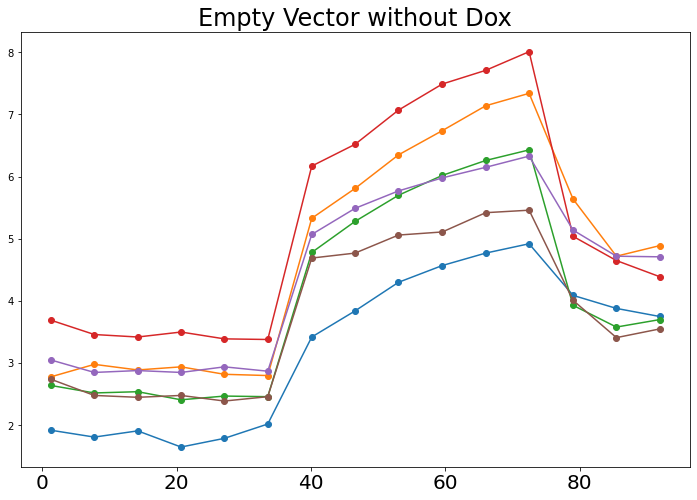

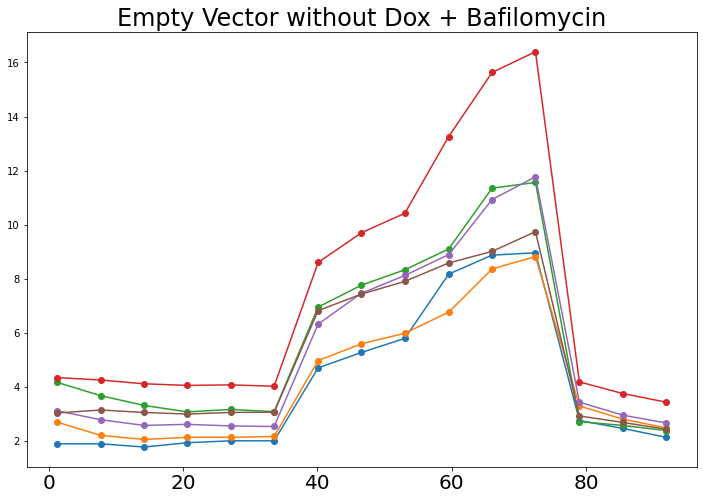

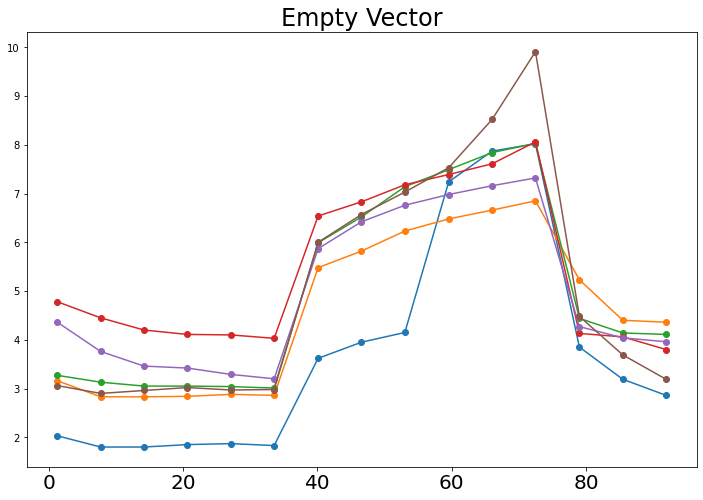

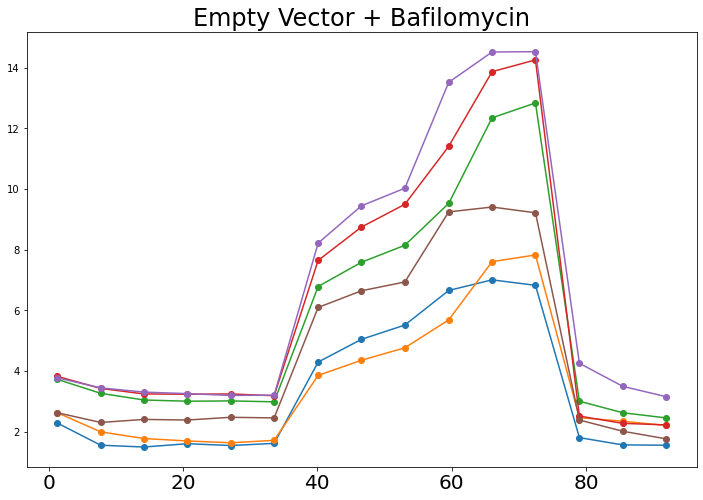

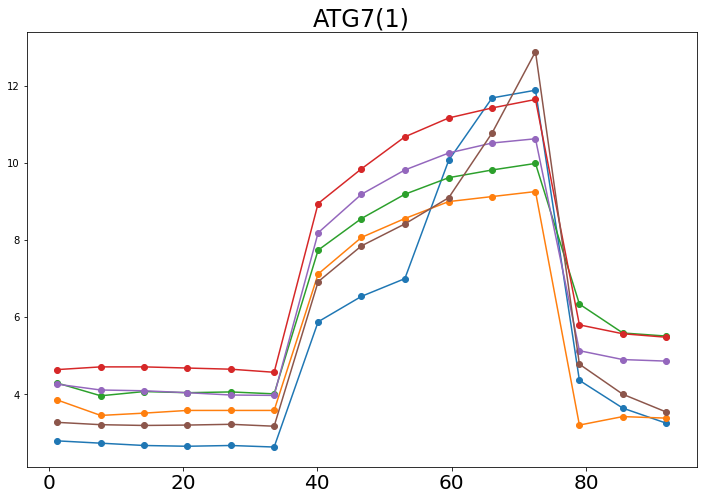

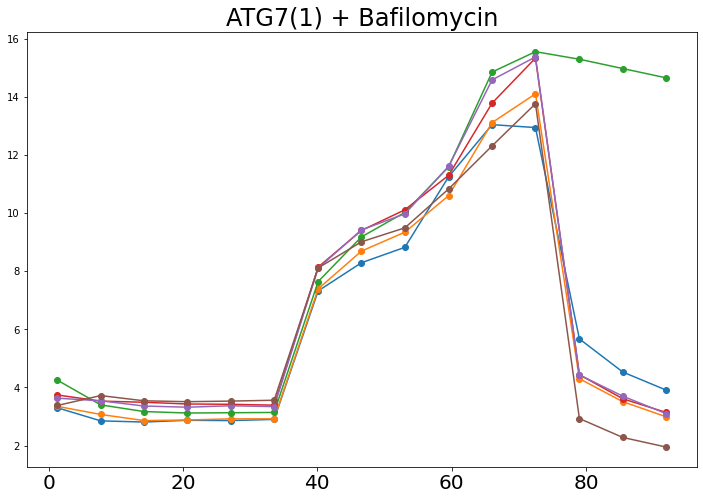

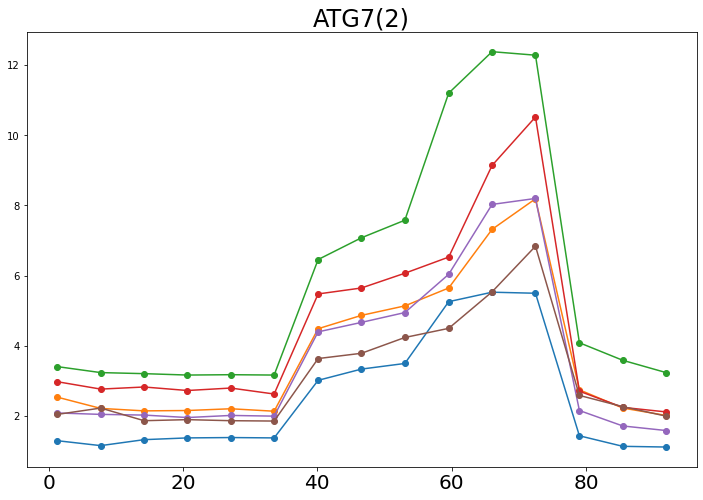

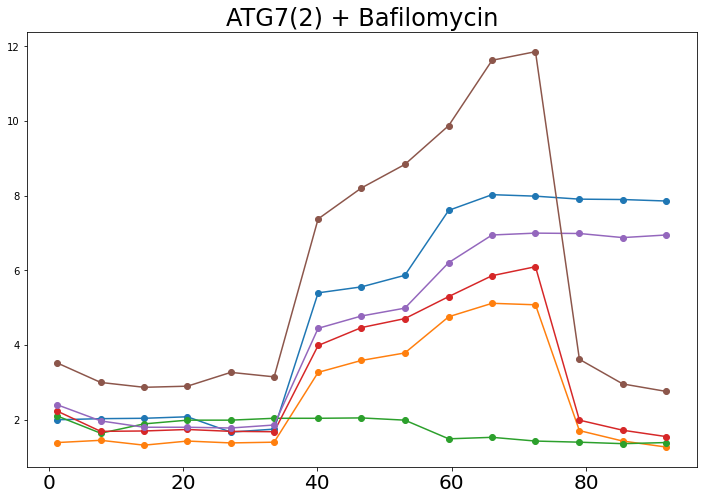

<Figure size 864x576 with 0 Axes>

In [6]:
#Visualization of all data
all_data = [[normal, 'Normal MEF'], [normal_baf, 'Normal MEF + Bafilomycin'],
            [ev_nodox, 'Empty Vector without Dox'], [ev_nodox_baf, 'Empty Vector without Dox + Bafilomycin'],
            [ev, 'Empty Vector'], [ev_baf, 'Empty Vector + Bafilomycin'],
            [wt1, 'ATG7(1)'], [wt1_baf, 'ATG7(1) + Bafilomycin'],
            [wt2, 'ATG7(2)'], [wt2_baf, 'ATG7(2) + Bafilomycin']]
        
for data in all_data:
    ##graph
    name = data[1]
    plt.plot(ecar_expNorm['Time'], ecar_expNorm[data[0]], 'o-')
    plt.title(name)
   
    plt.show()
    plt.clf()
    print()

In [7]:
#define the wells for each condition after removing bad wells 
normal = ['B02','C02','D02','E02','F02','G02']
ev_nodox = ['C03','D03','E03','F03','G03']
ev = ['C04','D04','E04','G04']
wt1 = ['C05','D05','E05','G05']
wt2 = ['B06','C06','D06','E06','F06','G06']

normal_baf = ['B07','C07','D07','E07','F07','G07']
ev_nodox_baf = ['B08','C08','D08','E08','F08','G08']
ev_baf = ['B09','C09','D09','E09','F09','G09']
wt1_baf = ['B10','C10','E10','F10','G10']
wt2_baf = ['C11','E11','G11']

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


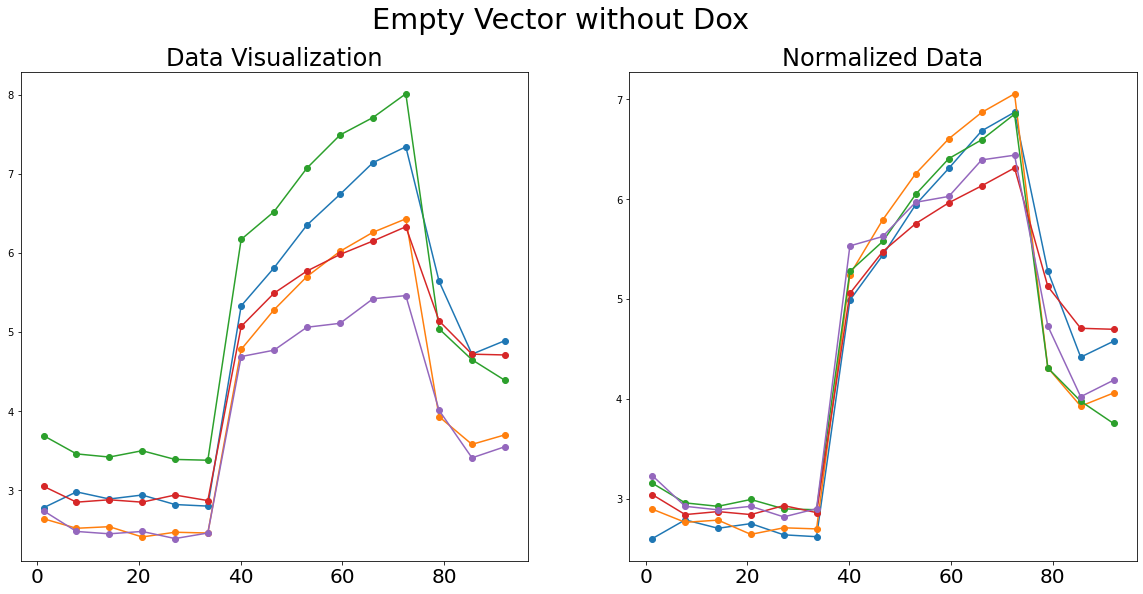

<Figure size 864x576 with 0 Axes>

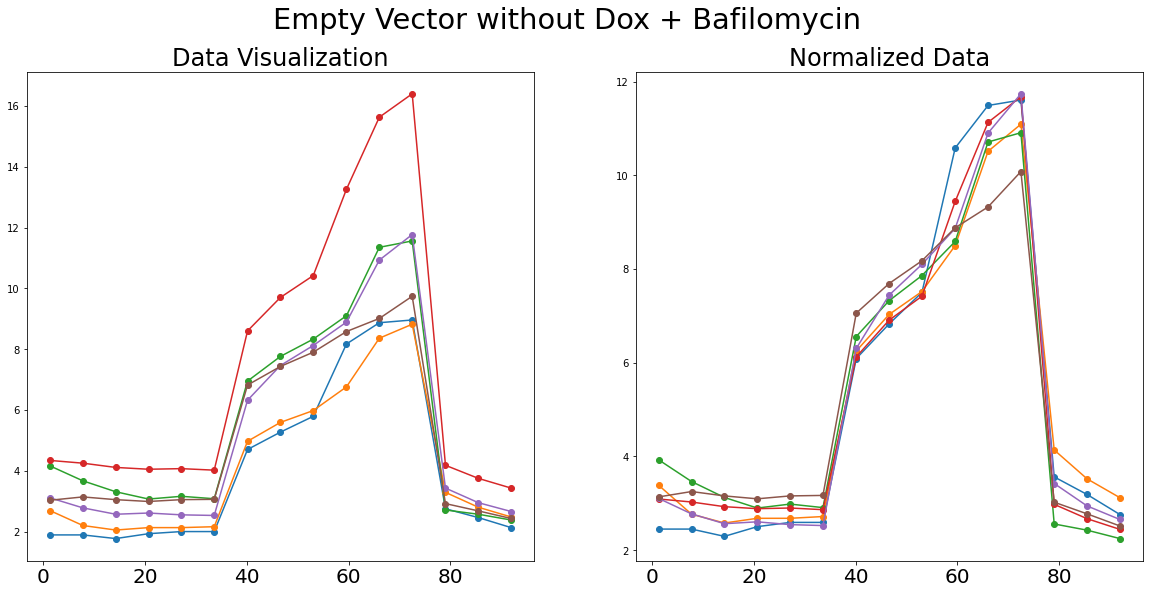

<Figure size 864x576 with 0 Axes>

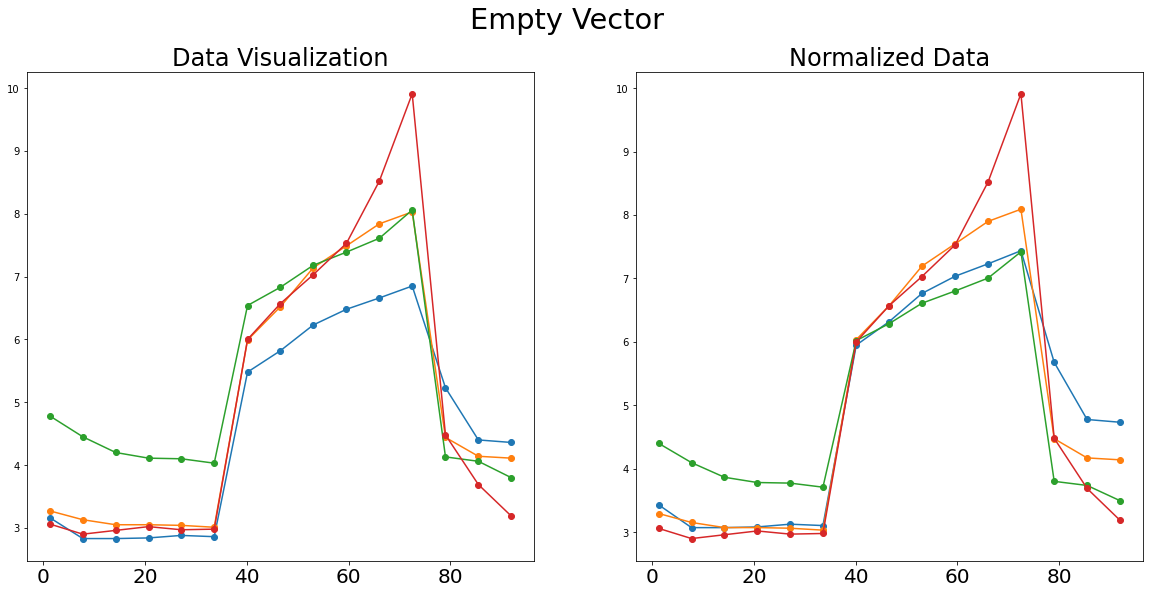

<Figure size 864x576 with 0 Axes>

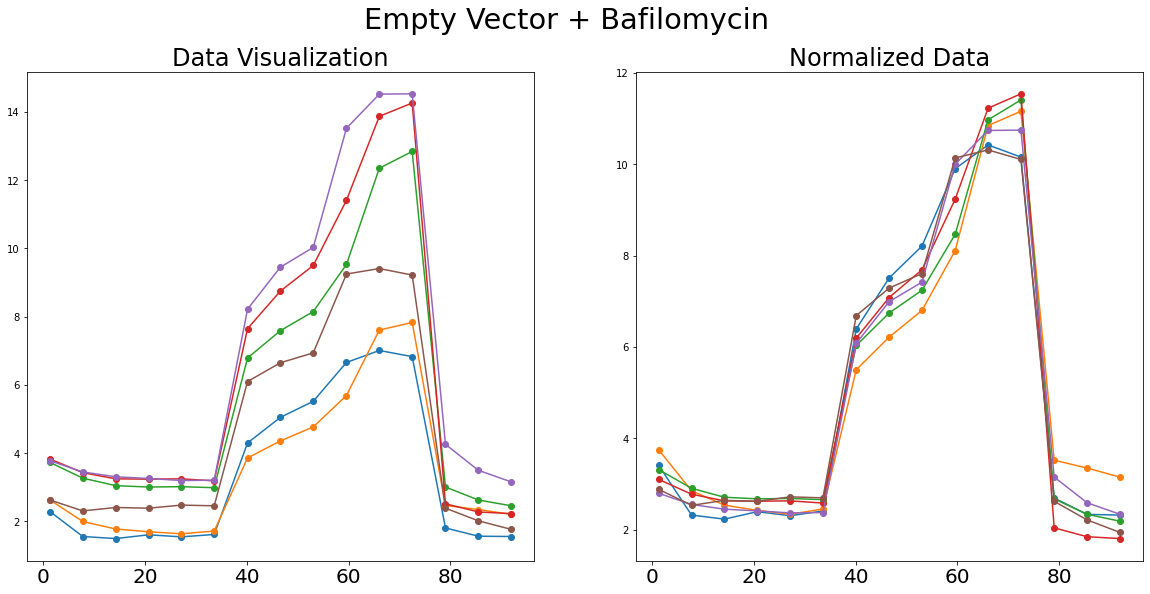

<Figure size 864x576 with 0 Axes>

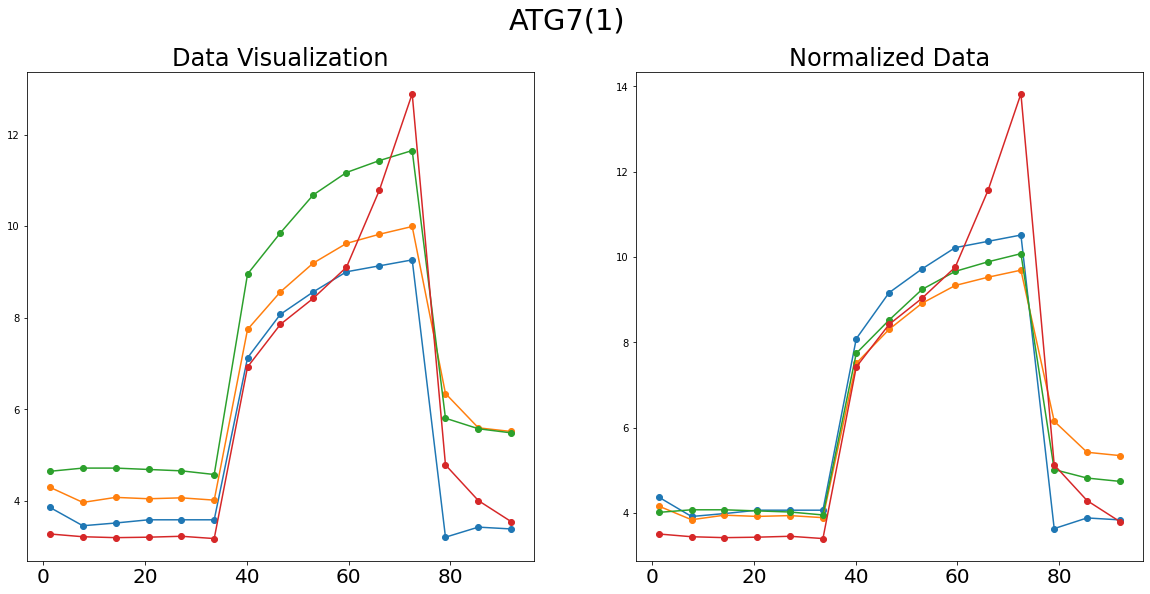

<Figure size 864x576 with 0 Axes>

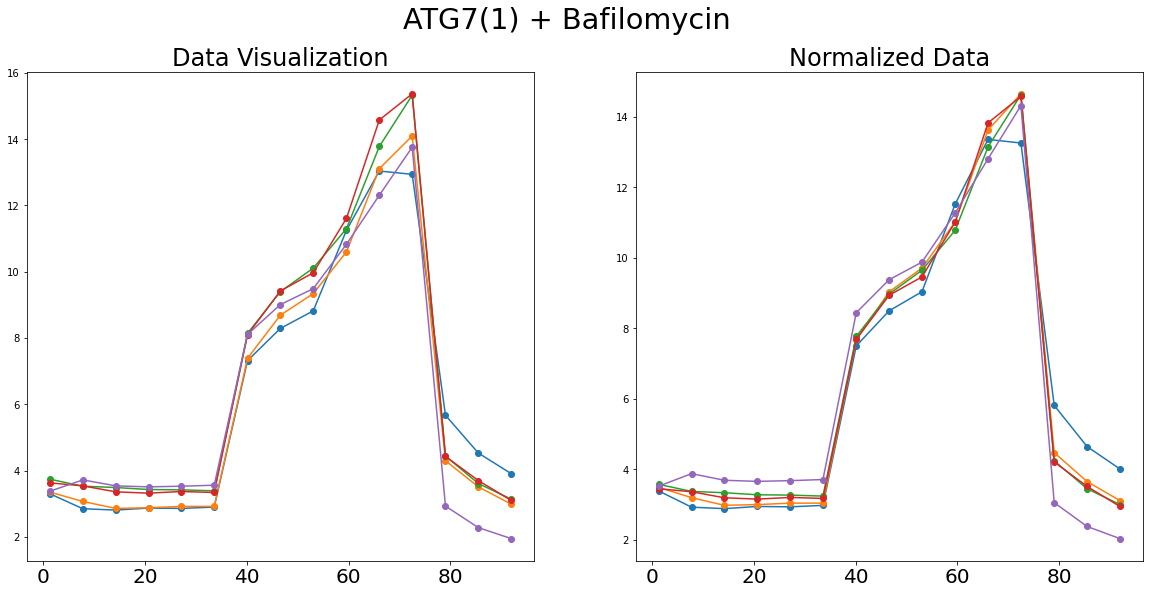

<Figure size 864x576 with 0 Axes>

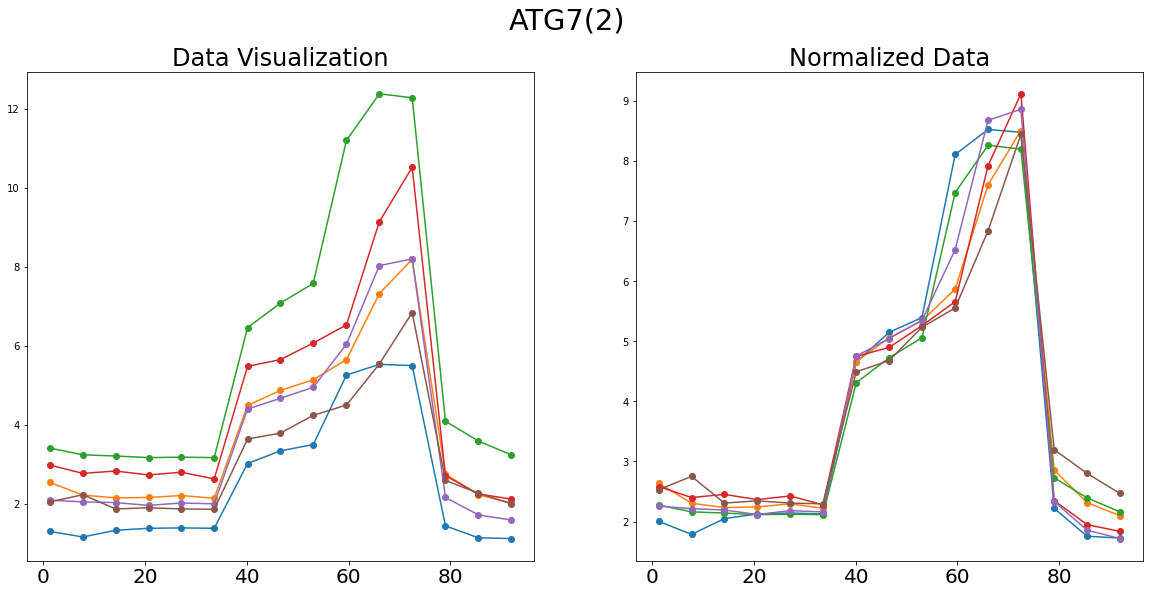

<Figure size 864x576 with 0 Axes>

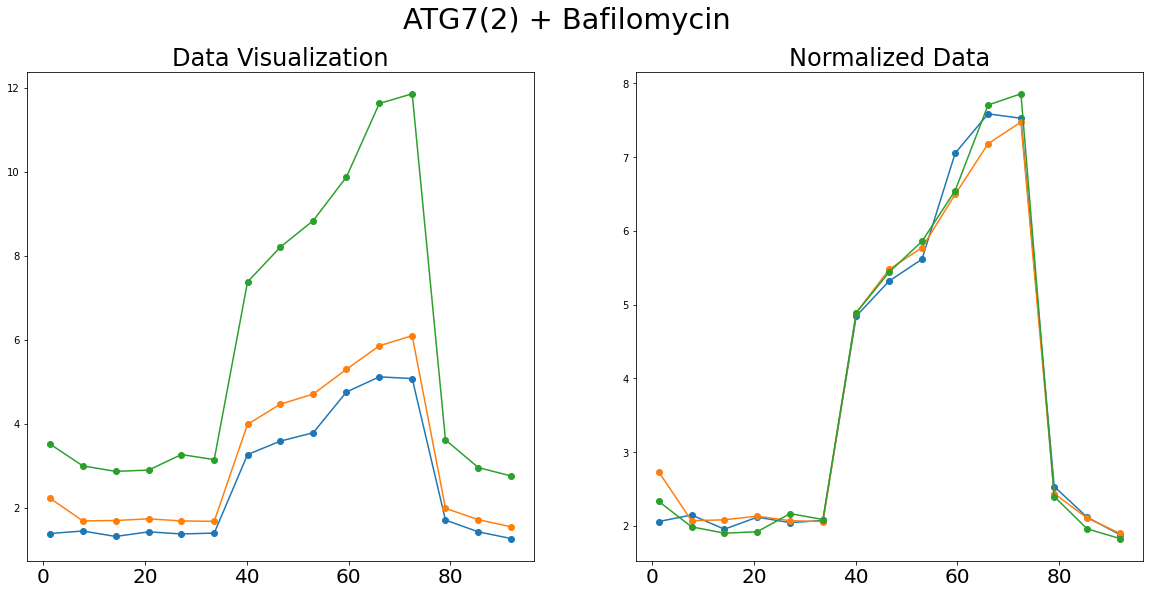

<Figure size 864x576 with 0 Axes>

In [8]:
#Normalization of the data after removing bad wells
all_data = [[ev_nodox, 'Empty Vector without Dox'], [ev_nodox_baf, 'Empty Vector without Dox + Bafilomycin'],
            [ev, 'Empty Vector'], [ev_baf, 'Empty Vector + Bafilomycin'],
            [wt1, 'ATG7(1)'], [wt1_baf, 'ATG7(1) + Bafilomycin'],
            [wt2, 'ATG7(2)'], [wt2_baf, 'ATG7(2) + Bafilomycin']]
        
for data in all_data:
    ##setting graphs
    name = data[1]
    fig, ax = plt.subplots(1,2, figsize=(20,9))
    fig.suptitle(name, fontsize="x-large")
    
    ##graph1
    ax[0].plot(ecar_expNorm['Time'], ecar_expNorm[data[0]], 'o-')
    ax[0].set_title("Data Visualization")
    
    ##normalization
    shift = ecar_expNorm[data[0]].mean()
    general_mean = ecar_expNorm[data[0]].mean().mean()
    relative_mu = shift/general_mean
    
    normalized_data = ecar_expNorm[data[0]]/relative_mu
    
    ##graph2
    ax[1].plot(ecar_expNorm['Time'], normalized_data, 'o-')
    ax[1].set_title("Normalized Data")
    
    plt.show()
    plt.clf()
    print()

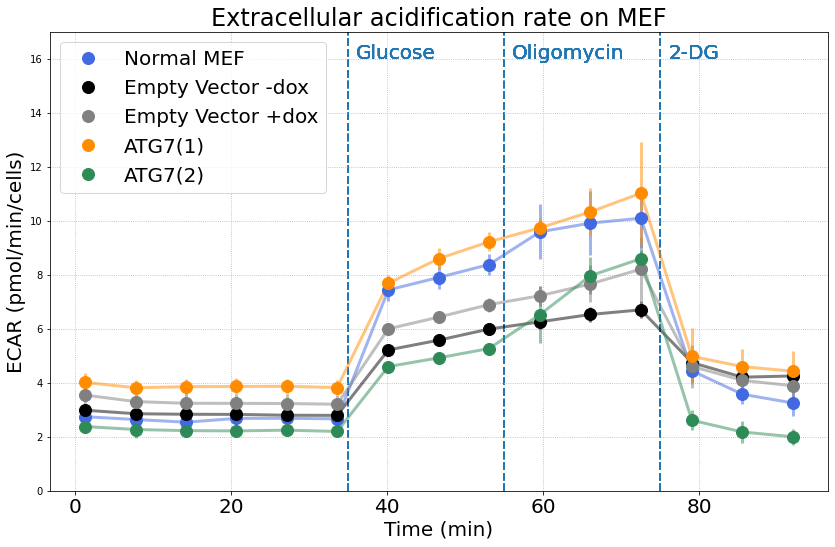

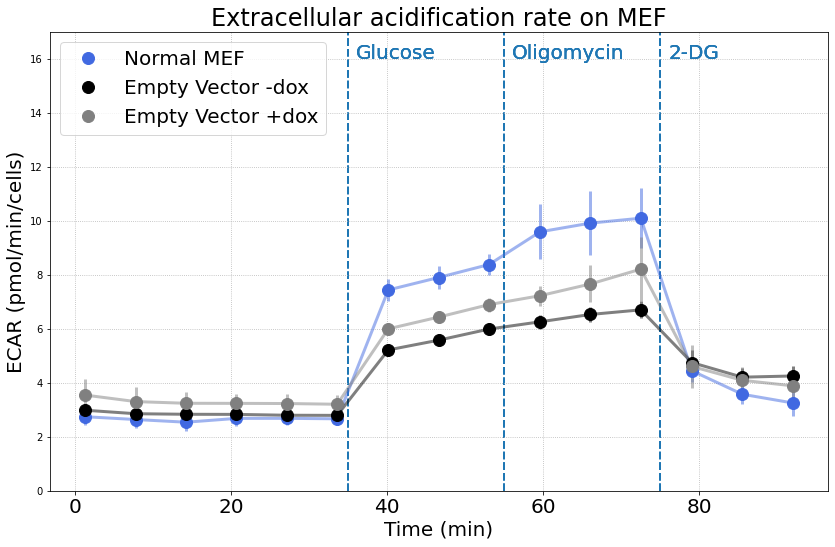

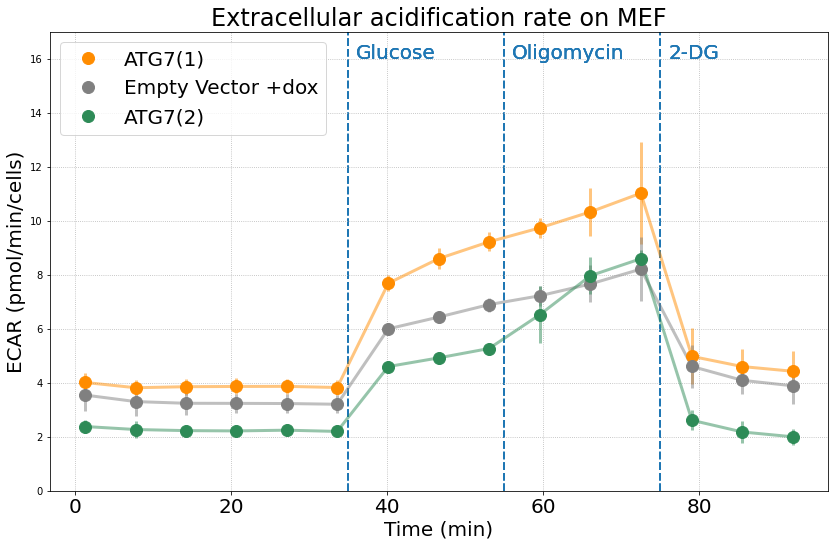

<Figure size 864x576 with 0 Axes>

In [9]:
#Normalization of the data after removing bad wells
##WITHOUT BAFILOMYCIN
all_data = [[normal, 'Normal MEF', "royalblue"],
            [ev_nodox, 'Empty Vector -dox', "black"],
            [ev, 'Empty Vector +dox', 'grey'],
            [wt1, 'ATG7(1)', 'darkorange'],
            [wt2, 'ATG7(2)', "seagreen"]]

all_control= [[normal, 'Normal MEF', "royalblue"],
              [ev_nodox, 'Empty Vector -dox', "black"],
              [ev, 'Empty Vector +dox', 'grey']]

all_isof = [[wt1, 'ATG7(1)', 'darkorange'],
            [ev, 'Empty Vector +dox', "grey"],
            [wt2, 'ATG7(2)', "seagreen"]]

contr_condit = all_data, all_control, all_isof

for data_ in contr_condit:
    for data in data_:
        ##setting graphs
        sample_labels = data[0]
        name_val = data[1]
        color_val = data[2]

        ##normalization
        shift = ecar_expNorm[sample_labels].mean()
        general_mean = ecar_expNorm[sample_labels].mean().mean()
        relative_mu = shift/general_mean
        normalized_data = ecar_expNorm[sample_labels]/relative_mu

        ##define mean and standard deviation
        mean = normalized_data.mean(axis=1)
        std = normalized_data.std(axis=1)

        ##plot graph
        plt.errorbar(ecar_expNorm['Time'], mean, std, lw=3, color=color_val, alpha=1/2)
        plt.plot(ecar_expNorm['Time'], mean, 'o', color=color_val, ms=12, label=name_val, zorder=999)

        matplotlib.pyplot.grid(ls=':')

        ##add vertical lines
        matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

        ##add texts
        matplotlib.pyplot.text(36, 16, 'Glucose', color='tab:blue')
        matplotlib.pyplot.text(56, 16, 'Oligomycin', color='tab:blue')
        matplotlib.pyplot.text(76, 16, '2-DG', color='tab:blue')

        ##settings
        matplotlib.pyplot.title('Extracellular acidification rate on MEF')
        matplotlib.pyplot.xlabel('Time (min)')
        matplotlib.pyplot.ylabel('ECAR (pmol/min/cells)')
        matplotlib.pyplot.legend(loc=2)
        matplotlib.pyplot.ylim([0, 17])
        matplotlib.pyplot.tight_layout()
    plt.show()
    plt.clf()

In [21]:
#data preparation
sample_labels = wt2, wt1, ev, ev_nodox, normal
name_conditions = 'ATG7(2)','ATG7(1)','Empty Vector +dox','Empty Vector -dox','Normal MEF'
color_conditions = "seagreen", 'darkorange', 'grey', "royalblue","black"

stats_data_basal = ecar_expNorm.iloc[:6, :]
stats_data_max = ecar_expNorm.iloc[9:12, :]

dfs = stats_data_basal, stats_data_max
infos = 'basal', 'maximum'

#basal and maximal selection
for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    
    df.reset_index(inplace = True, drop= True)
    
    #conditions selection
    for j in range(len(sample_labels)):
        ##setting graphs
        sample_label = sample_labels[j]
        name_condition = name_conditions[j]
        color_condition = color_conditions[j]

        #for each conditon:
        ##select the value per condition
        df_ephemeral = pandas.DataFrame()
        df_ephemeral[sample_label]  = df[sample_label]
        ##add mean column for this condition
        df_ephemeral[name_condition] = df_ephemeral.mean(axis= 1)
        ##pop this column
        col = df_ephemeral.pop(name_condition)
        ##insert it in position 1 in  the full dataframe
        df.insert(1, name_condition, col)
        
    #Select the inserted collumns only
    df = df.iloc[:, :6]

    path = 'ATG7/MEF/Seahorse_results/seahorse_ECAR/dataframes_for_input/'
    file_name = f'ecar_{experimentN}_df_dmso_{info}.csv'
    df.to_csv(output_file_directory+path+file_name, header=True, index=False, sep=',')
    print(df.iloc[:,1:])

   Normal MEF  Empty Vector -dox  Empty Vector +dox  ATG7(1)   ATG7(2)
0    2.745000              2.980             3.5675   4.0125  2.395000
1    2.651667              2.858             3.3275   3.8325  2.278333
2    2.566667              2.836             3.2600   3.8700  2.236667
3    2.686667              2.836             3.2550   3.8750  2.216667
4    2.685000              2.802             3.2475   3.8775  2.245000
5    2.670000              2.794             3.2200   3.8325  2.196667
   Normal MEF  Empty Vector -dox  Empty Vector +dox  ATG7(1)   ATG7(2)
0    9.555000              6.268             7.2225   9.7225  6.530000
1    9.871667              6.536             7.6575  10.2900  7.990000
2   10.066667              6.714             8.2125  10.9475  8.588333


In [11]:
# #Boxplot and Stats
# Data = stats_data
# shape = Data.shape
# shape = shape[0]

# #select the sample type column
# Time = {'Time':[Data.iloc[:,1][i]
#   for i in range(0, shape)]}

# #convert to df, and copy it 3 times
# Timedf = pandas.DataFrame(Time)
# Timedf = pandas.concat([Timedf,Timedf,Timedf,Timedf,Timedf])
# Timedf.reset_index(drop=True, inplace=True)

# # Y for expression value 
# y = {'y':[Data.iloc[:,j][i]
#   for j in range(1,6)
#     for i in range(0, shape)]}

# #create df with Y 
# data_distrib = pandas.DataFrame(y)

# # X for ATG7/iso1/iso2                              
# data_distrib.loc[:shape,'x'] = 'Normal'
# data_distrib.loc[shape: shape*2,'x'] = 'Empty Vector \n-dox'
# data_distrib.loc[shape*2:shape*3,'x'] = 'Empty Vector \n+dox'
# data_distrib.loc[shape*3:shape*4,'x'] = 'ATG7(1)'
# data_distrib.loc[shape*4:,'x'] = 'ATG7(2)'

# #graph
# seaborn.catplot(x="x", y="y", height = 7, aspect= 1.6, kind="box", palette = 'Set2', data = data_distrib, 
#               boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

# plt.ylabel('ECAR (pmol/min/cells)')
# plt.xlabel('')
# plt.title('Extracellular acidification rate on MEF', x=.55)
# plt.grid(alpha = 0.5)

# # save
# path = 'ATG7/Seahorse_results/seahorse_ECAR/'
# plt.savefig(output_file_directory+path+'ecar_exp_1_normal.svg')


# +BAF

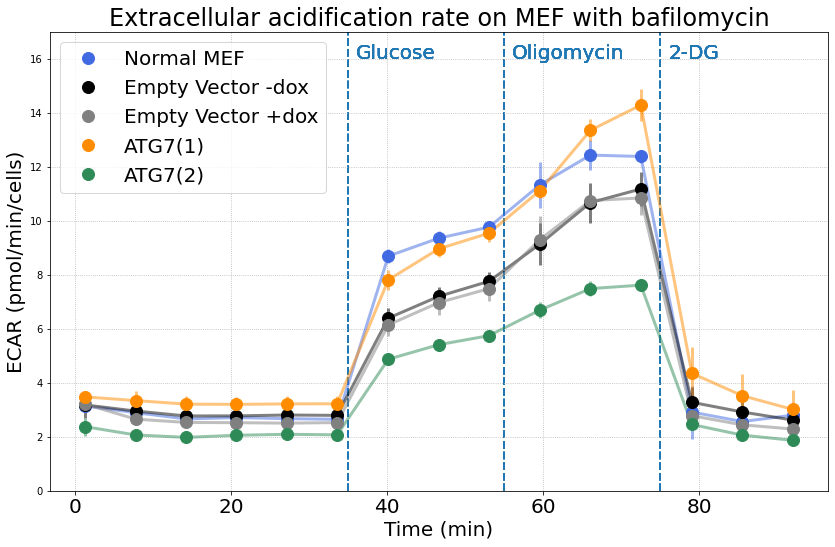

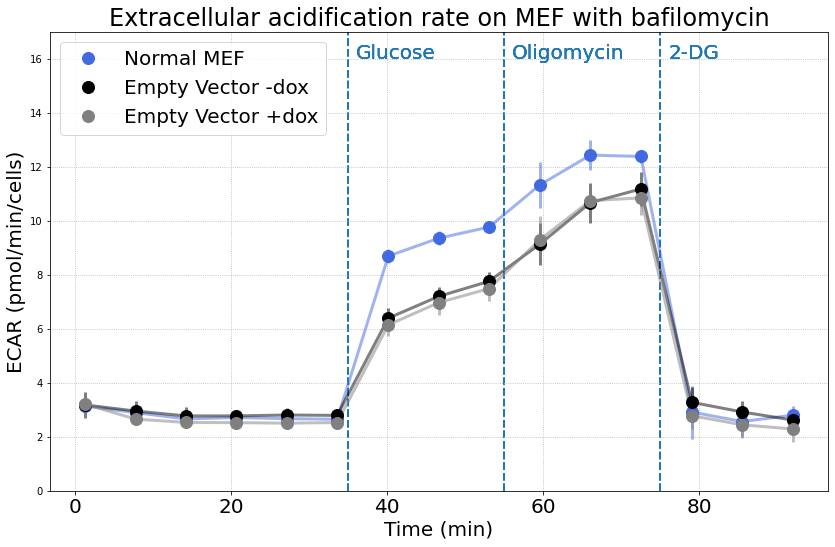

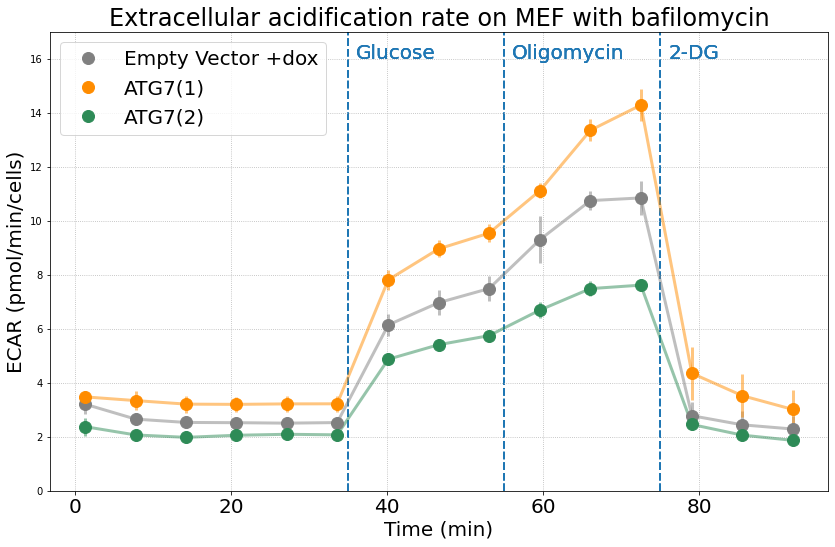

<Figure size 864x576 with 0 Axes>

In [12]:
#Normalization of the data after removing bad wells
##WITH BAFILOMYCIN

all_data = [[normal_baf, 'Normal MEF', "royalblue"],
            [ev_nodox_baf, 'Empty Vector -dox', "black"],
            [ev_baf, 'Empty Vector +dox', 'grey'],
            [wt1_baf, 'ATG7(1)', 'darkorange'],
            [wt2_baf, 'ATG7(2)', "seagreen"]]

all_control= [[normal_baf, 'Normal MEF', "royalblue"],
              [ev_nodox_baf, 'Empty Vector -dox', "black"],
              [ev_baf, 'Empty Vector +dox', 'grey']]

all_isof = [[ev_baf, 'Empty Vector +dox', "grey"],
            [wt1_baf, 'ATG7(1)', 'darkorange'],
            [wt2_baf, 'ATG7(2)', "seagreen"]]

contr_condit = all_data, all_control, all_isof

for data_ in contr_condit:
    for data in data_:
        ##setting graphs
        sample_labels = data[0]
        name_val = data[1]
        color_val = data[2]

        ##normalization
        shift = ecar_expNorm[sample_labels].mean()
        general_mean = ecar_expNorm[sample_labels].mean().mean()
        relative_mu = shift/general_mean
        normalized_data = ecar_expNorm[sample_labels]/relative_mu

        ##define mean and standard deviation
        mean = normalized_data.mean(axis=1)
        std = normalized_data.std(axis=1)

        ##plot graph
        plt.errorbar(ecar_expNorm['Time'], mean, std, lw=3, color=color_val, alpha=1/2)
        plt.plot(ecar_expNorm['Time'], mean, 'o', color=color_val, ms=12, label=name_val, zorder=999)

        matplotlib.pyplot.grid(ls=':')

        ##add vertical lines
        matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
        matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

        ##add texts
        matplotlib.pyplot.text(36, 16, 'Glucose', color='tab:blue')
        matplotlib.pyplot.text(56, 16, 'Oligomycin', color='tab:blue')
        matplotlib.pyplot.text(76, 16, '2-DG', color='tab:blue')

        ##settings
        matplotlib.pyplot.title('Extracellular acidification rate on MEF with bafilomycin')
        matplotlib.pyplot.xlabel('Time (min)')
        matplotlib.pyplot.ylabel('ECAR (pmol/min/cells)')
        matplotlib.pyplot.legend(loc=2)
        matplotlib.pyplot.ylim([0, 17])
        matplotlib.pyplot.tight_layout()
    plt.show()
    plt.clf()

In [16]:
df

,Time,Normal MEF,Empty Vector -dox,Empty Vector +dox,ATG7(1),ATG7(2)
0,59.57,11.393333,9.126667,9.343333,11.118,6.646667
1,66.03,12.441667,10.691667,10.795000,13.364,7.536667
2,72.49,12.416667,11.208333,10.918333,14.300,7.680000


In [13]:
#data preparation + TRY TO ADD BASAL LEVEL DF
sample_labels = wt2_baf, wt1_baf, ev_baf, ev_nodox_baf, normal_baf
name_conditions = 'ATG7(2)','ATG7(1)','Empty Vector +dox','Empty Vector -dox','Normal MEF'
color_conditions = "seagreen", 'darkorange', 'grey', "royalblue","black"

stats_data_basal = ecar_expNorm.iloc[:6, :]
stats_data_max = ecar_expNorm.iloc[9:12, :]

dfs = stats_data_basal, stats_data_max
infos = 'basal', 'maximum'

#basal and maximal selection
for i in range(len(dfs)):
    df = dfs[i]
    info = infos[i]
    
    df.reset_index(inplace = True, drop= True)
    
    #conditions selection
    for j in range(len(sample_labels)):
        ##setting graphs
        sample_label = sample_labels[j]
        name_condition = name_conditions[j]
        color_condition = color_conditions[j]

        #for each conditon:
        ##select the value per condition
        df_ephemeral = pandas.DataFrame()
        df_ephemeral[sample_label]  = df[sample_label]
        ##add mean column for this condition
        df_ephemeral[name_condition] = df_ephemeral.mean(axis= 1)
        ##pop this column
        col = df_ephemeral.pop(name_condition)
        ##insert it in position 1 in  the full dataframe
        df.insert(1, name_condition, col)
        
    #Select the inserted collumns only
    df = df.iloc[:, :6]

    path = 'ATG7/MEF/Seahorse_results/seahorse_ECAR/dataframes_for_input/'
    file_name = f'ecar_{experimentN}_df_baf_{info}.csv'
    df.to_csv(output_file_directory+path+file_name, header=True, index=False, sep=',')
    print(df.iloc[:,1:])

   Normal MEF  Empty Vector -dox  Empty Vector +dox  ATG7(1)   ATG7(2)
0    3.170000           3.203333           3.148333    3.480  2.380000
1    2.886667           2.988333           2.670000    3.342  2.046667
2    2.641667           2.810000           2.550000    3.212  1.963333
3    2.690000           2.796667           2.535000    3.202  2.023333
4    2.658333           2.826667           2.523333    3.220  2.113333
5    2.631667           2.808333           2.531667    3.222  2.076667
   Normal MEF  Empty Vector -dox  Empty Vector +dox  ATG7(1)   ATG7(2)
0   11.393333           9.126667           9.343333   11.118  6.646667
1   12.441667          10.691667          10.795000   13.364  7.536667
2   12.416667          11.208333          10.918333   14.300  7.680000


In [14]:
# #Boxplot and Stats
# Data = stats_data
# shape = Data.shape
# shape = shape[0]

# #select the sample type column
# Time = {'Time':[Data.iloc[:,1][i]
#   for i in range(0, shape)]}

# #convert to df, and copy it 3 times
# Timedf = pandas.DataFrame(Time)
# Timedf = pandas.concat([Timedf,Timedf,Timedf,Timedf,Timedf])
# Timedf.reset_index(drop=True, inplace=True)

# # Y for expression value 
# y = {'y':[Data.iloc[:,j][i]
#   for j in range(1,6)
#     for i in range(0, shape)]}

# #create df with Y 
# data_distrib = pandas.DataFrame(y)

# # X for ATG7/iso1/iso2                              
# data_distrib.loc[:shape,'x'] = 'Normal'
# data_distrib.loc[shape: shape*2,'x'] = 'Empty Vector \n-dox'
# data_distrib.loc[shape*2:shape*3,'x'] = 'Empty Vector \n+dox'
# data_distrib.loc[shape*3:shape*4,'x'] = 'ATG7(1)'
# data_distrib.loc[shape*4:,'x'] = 'ATG7(2)'

# #graph
# seaborn.catplot(x="x", y="y", height = 7, aspect= 1.6, kind="box", palette = 'Set2', data = data_distrib, 
#               boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

# plt.ylabel('ECAR (pmol/min/cells)')
# plt.xlabel('')
# plt.title('Extracellular acidification rate on MEF with bafilomycin', x=.55)
# plt.grid(alpha = 0.5)

# # save
# # path = 'ATG7/Seahorse_results/seahorse_ECAR/'
# # plt.savefig(output_file_directory+path+'ecar_exp_1_bafilomycin.svg')